In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read the image provided:

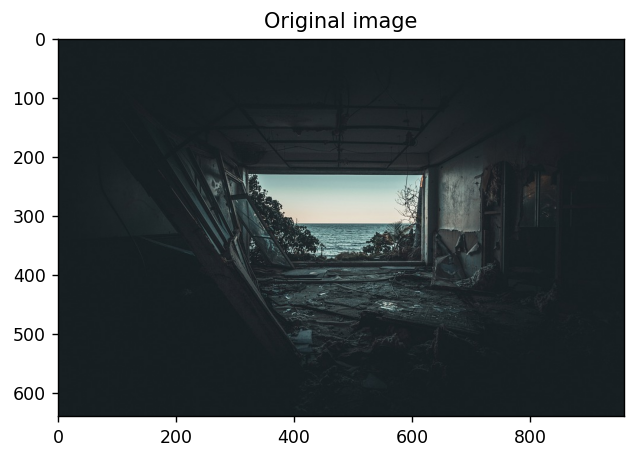

In [14]:
im = cv2.imread('data/ocean.jpg')
origrgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.set_dpi(125)
imgplot = plt.imshow(origrgb)
plt.title('Original image')
plt.show()

Prompt the user to draw a rectangular bounding box on the image to mark the ROI:

In [15]:
x, y, w, h = cv2.selectROI(im, fromCenter=0)
cv2.destroyAllWindows()

Using NumPy to create a totally blank image with all pixels being black(0). This new image will have the same dimensions in terms of width and height as the original image:

In [16]:
mymask = np.zeros(im.shape[:2], dtype="uint8")

Within the mask's ROI, make all the pixels white (255). This is now the mask image:

In [17]:
mymask[int(y):int(y + h), int(x):int(x + w)] = 255

Display the mask:

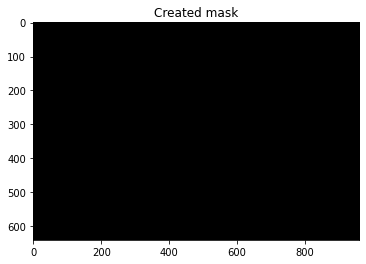

In [18]:
mask_rgb = cv2.cvtColor(mymask, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(mask_rgb)
plt.title('Created mask')
plt.show()

Save the mask to a .png file:

In [19]:
cv2.imwrite('data/mask_image.png', mymask)

True

Convert the image to the HSV space:

In [20]:
imgHSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

Compute a histogram of the masked region in the V plane:

In [21]:
hist = cv2.calcHist([imgHSV], [2], mymask, [256], [0, 255])

Plot this historgram:

Text(0.5, 1.0, 'V plane')

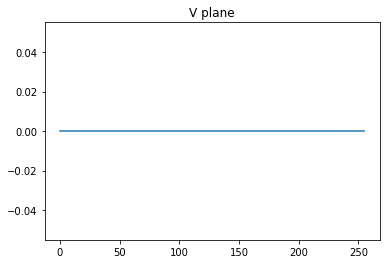

In [22]:
plt.plot(hist)
plt.title('V plane')